In [ ]:
# Uploading the file from Local Drive on Customer Churn
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
# Uploading the file from Local Drive on Customer Churn
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


# Data Declarations

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import Dropout



## Understanding Data

In [ ]:
dataset = pd.read_csv('train.csv')
dataset.head(10)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


# Data Preprocessing

In [ ]:
dataset.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

###Drop CustomerId

In [ ]:
dataset.international_plan.replace([0,1], ["no", "yes"], inplace = True)# For One Hot Encoding replacing the 0, 1 values
#dataset.TotalCharges.replace([" "], ["0"], inplace = True) # All null values replaced by zero
#dataset.TotalCharges=dataset.TotalCharges.astype(float) # Converting string to type Float
dataset.voice_mail_plan.replace([0,1], ["no", "yes"], inplace = True)# For One Hot Encoding replacing the 0, 1 values

#dataset.drop("customerID", axis= 1, inplace= True)
dataset.churn.replace(["yes", "no"], [1, 0], inplace= True)




In [ ]:
dataset.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

## Convert to One Hot Encoding

In [ ]:
dataset = pd.get_dummies(dataset)
dataset.head(10)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   number_vmail_messages          4250 non-null   int64  
 2   total_day_minutes              4250 non-null   float64
 3   total_day_calls                4250 non-null   int64  
 4   total_day_charge               4250 non-null   float64
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   int64  
 7   total_eve_charge               4250 non-null   float64
 8   total_night_minutes            4250 non-null   float64
 9   total_night_calls              4250 non-null   int64  
 10  total_night_charge             4250 non-null   float64
 11  total_intl_minutes             4250 non-null   float64
 12  total_intl_calls               4250 non-null   i

In [ ]:
print(dataset)
X= dataset.drop("churn", axis = 1)
y=dataset.churn

      account_length  number_vmail_messages  total_day_minutes  \
0                107                     26              161.6   
1                137                      0              243.4   
2                 84                      0              299.4   
3                 75                      0              166.7   
4                121                     24              218.2   
...              ...                    ...                ...   
4245              83                      0              188.3   
4246              73                      0              177.9   
4247              75                      0              170.7   
4248              50                     40              235.7   
4249              86                     34              129.4   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                 123             27.47              195.5              103   
1                 114             41.38          

## Separate Training and Test Data

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#print(X_train)
#X_train.shape
#rint(y_train)
#y_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train)
X_train.shape
print(y_train)
y_train.shape


[[ 0.37194199 -0.56791143 -0.00480687 ...  3.11966717  0.59528635
  -0.59528635]
 [ 0.42232778  2.03658449  0.19331919 ... -0.32054702 -1.67986382
   1.67986382]
 [-0.58538805  0.69712945  0.45625285 ... -0.32054702 -1.67986382
   1.67986382]
 ...
 [ 1.65677967  2.48306951  0.30441792 ... -0.32054702 -1.67986382
   1.67986382]
 [-1.31598203 -0.56791143  0.33219261 ... -0.32054702  0.59528635
  -0.59528635]
 [ 1.20330755  0.25064443  1.34504268 ... -0.32054702 -1.67986382
   1.67986382]]
1340    0
3790    0
2647    0
4009    0
3537    0
       ..
3444    0
466     0
3092    1
3772    0
860     0
Name: churn, Length: 3400, dtype: int64


(3400,)

#Create the Artificial Neural Network Model in Keras

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=73, activation = 'relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = "binary_crossentropy", optimizer = 'RMSProp', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1184      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                2

In [ ]:
history = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs = 50, batch_size = 10)

Epoch 1/50
340/340 [==============================] - 2s 3ms/step - loss: 0.4731 - accuracy: 0.8465 - val_loss: 0.4226 - val_accuracy: 0.8482
Epoch 2/50
340/340 [==============================] - 1s 2ms/step - loss: 0.4097 - accuracy: 0.8615 - val_loss: 0.4063 - val_accuracy: 0.8482
Epoch 3/50
340/340 [==============================] - 1s 2ms/step - loss: 0.3823 - accuracy: 0.8621 - val_loss: 0.3895 - val_accuracy: 0.8482
Epoch 4/50
340/340 [==============================] - 1s 2ms/step - loss: 0.3668 - accuracy: 0.8621 - val_loss: 0.3833 - val_accuracy: 0.8482
Epoch 5/50
340/340 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8621 - val_loss: 0.3778 - val_accuracy: 0.8482
Epoch 6/50
340/340 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8621 - val_loss: 0.3782 - val_accuracy: 0.8482
Epoch 7/50
340/340 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8621 - val_loss: 0.3666 - val_accuracy: 0.8482
Epoch 

##Plot the Training and the Test Error

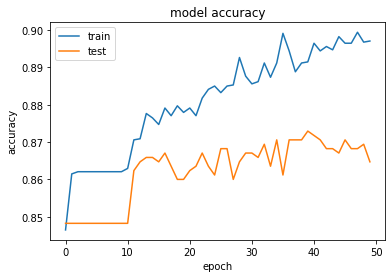

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_pred = np.where(y_prob > 0.5, 1,0)
print(y_pred)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

27/27 [==============================] - 0s 1ms/step
[[5.59575781e-02]
 [3.72378826e-02]
 [4.17488180e-02]
 [4.04061154e-02]
 [2.24691276e-02]
 [1.82732418e-02]
 [8.02706555e-02]
 [1.89145163e-01]
 [7.09218606e-02]
 [6.18690312e-01]
 [8.18017311e-03]
 [3.35340062e-03]
 [6.76647155e-03]
 [2.63535649e-01]
 [4.81409207e-02]
 [1.43122897e-01]
 [3.63369249e-02]
 [3.59499566e-02]
 [1.18169896e-02]
 [1.50994249e-02]
 [3.84608507e-02]
 [6.54307529e-02]
 [8.47131088e-02]
 [5.74395582e-02]
 [2.57475814e-03]
 [7.40075409e-02]
 [4.44833143e-03]
 [4.45290692e-02]
 [1.63074568e-04]
 [9.54874605e-03]
 [5.01451492e-02]
 [3.63550365e-01]
 [8.07848573e-03]
 [1.35198771e-03]
 [7.28348494e-02]
 [5.30693941e-02]
 [3.42107043e-02]
 [9.05708689e-03]
 [2.96420250e-02]
 [2.85155121e-02]
 [1.16235055e-01]
 [6.17168248e-01]
 [7.81315565e-03]
 [3.23769122e-01]
 [1.83644798e-02]
 [4.58018854e-03]
 [2.97153682e-01]
 [3.09722483e-01]
 [3.64740640e-01]
 [4.85700974e-03]
 [5.45583367e-02]
 [5.42453647e-01]
 [4.3210536